# Video Lesson \#14

In [1]:
# Import packages
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

## Part 1: `SciPy` – linear regression

### Generate a dataset with a linear trend plus some random noise

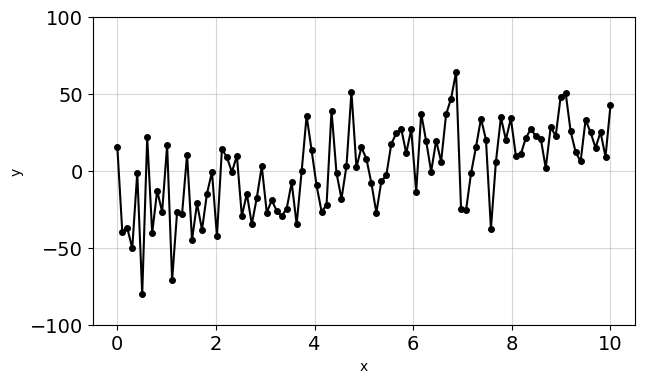

In [2]:
# Generate some x data points
n = 100 # number of points
x = np.linspace(0, 10, n)

# Generate some y data with a linear trend plus some random noise
np.random.seed(1)  # For reproducibility (change the seed to generate a different set of random values)
y = 5 * x - 25 + 25*np.random.randn(n) # Linear trend with added noise

# Make a plot of the data to see what we generated
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x, y, 'k-', marker='o', markersize=4)
ax.set_ylim([-100, 100])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.tick_params(axis='both', labelsize=14)
ax.grid(alpha=0.5)

### Calculate a linear regression based on the data 

In [3]:
# calculate a linear regression based on the data we generated above
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)

print('The slope i', round(slope, 2))
print('The y-intercept is', round(intercept, 2))
print('The r-value is', round(rvalue, 2))
print('The p-value is', pvalue)
print('The standard error is', round(stderr, 2))

The slope i 5.83
The y-intercept is -27.62
The r-value is 0.61
The p-value is 1.4302361401489682e-11
The standard error is 0.76


### Plot a trend line from a linear regression

Apply the formula $y = m x + b$, where $y$ is a _new_ 1-D array calculated from:
- $m$: the `slope` value calculated using `linregress()`
- $x$: your original 1-D numpy array of x values
- $b$: the `intercept` value calculated using `linregress()`

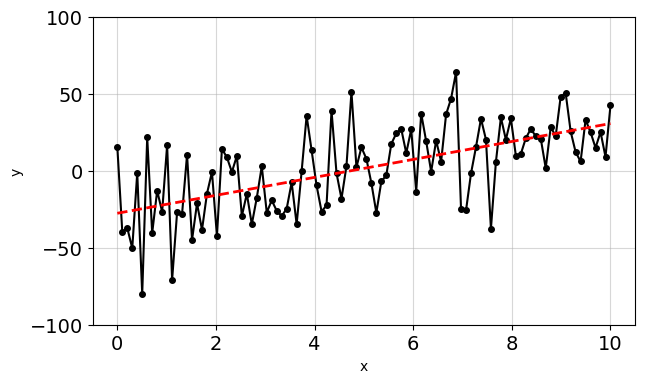

In [4]:
# calculate y-values for trend line
y_trend = slope * x + intercept

# make a figure
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x, y, 'k-', marker='o', markersize=4) # original data points
ax.plot(x, y_trend, 'r--', lw=2)  # trend line
ax.set_ylim([-100, 100])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.tick_params(axis='both', labelsize=14)
ax.grid(alpha=0.5)

### What if your x-values are `datetime` objects?

In [5]:
import matplotlib.dates as mdates

# linregress() won't be able handle this array of datetime objects as x-values
t = np.array([datetime(2020, 1, 1),
              datetime(2020, 2, 1),
              datetime(2020, 3, 1)])

# instead, convert the datetime objects to numbers representing 
# 'days since 1970-01-01 UTC', which linregress() can handle
t_as_numbers = mdates.date2num(t)

print(t_as_numbers)

[18262. 18293. 18322.]
